# INSURANCE PREMIUM PREDICTION

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('insurance[1].csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#cheack missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
df1=df

In [15]:
df1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0, 0.5, 'smokers')

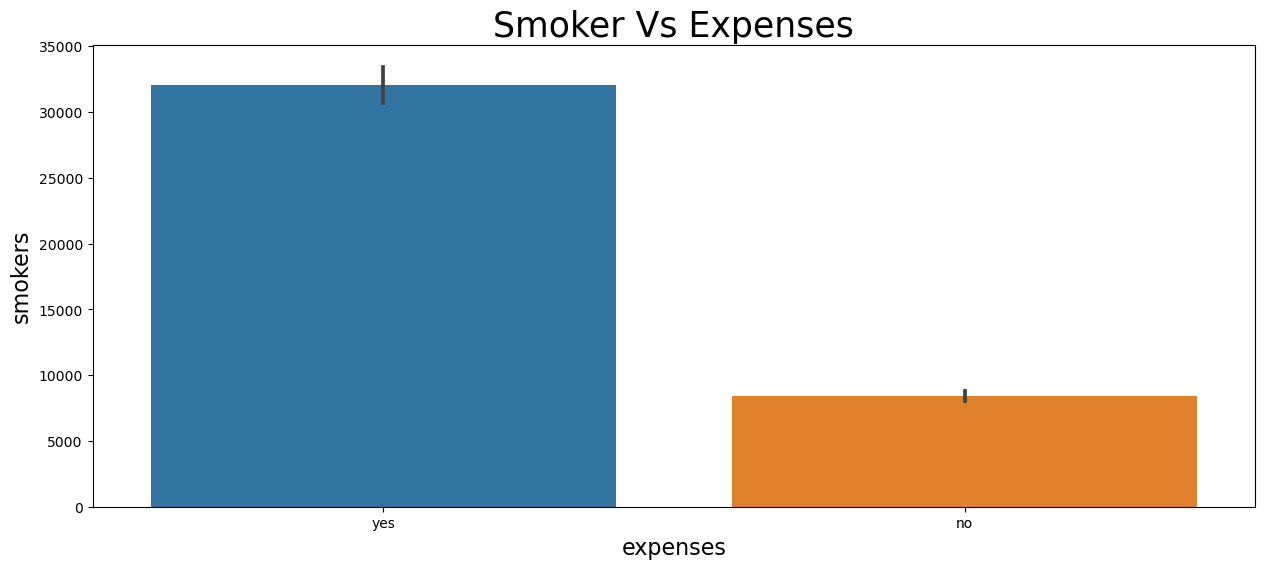

In [17]:
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
bp3=sns.barplot(x='smoker',y='expenses',data=df1)
bp3.set_xlabel("expenses", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

Text(0, 0.5, 'expenses')

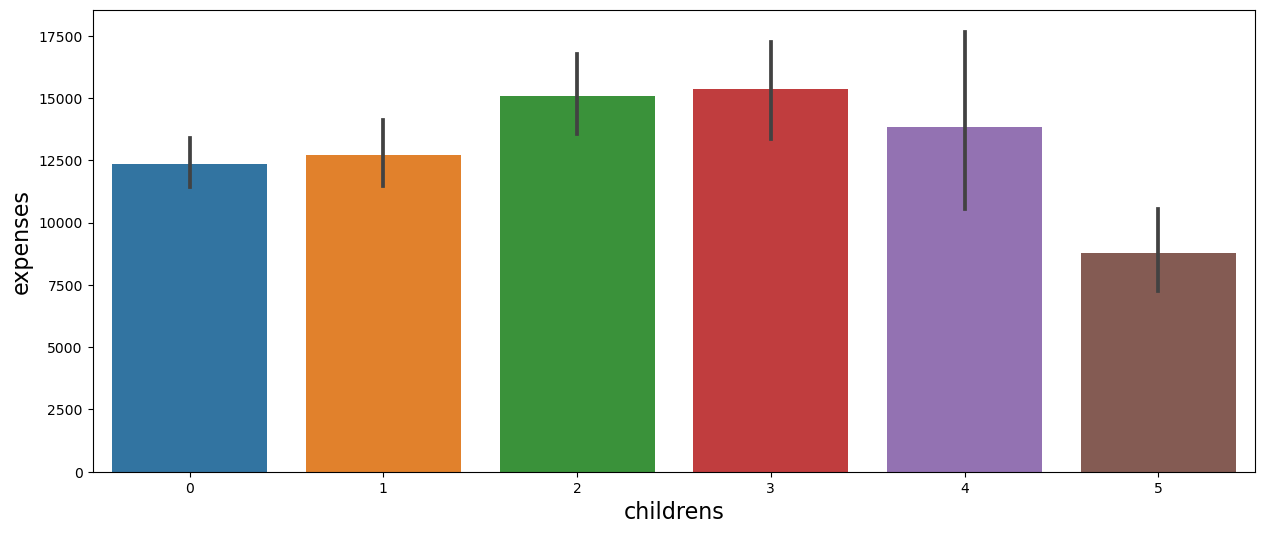

In [18]:
#Expenses of smokers are more as compared to non smokers

plt.figure(figsize=(15,6))
bp4=sns.barplot(x='children',y='expenses',data=df1)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)


Text(0, 0.5, 'count')

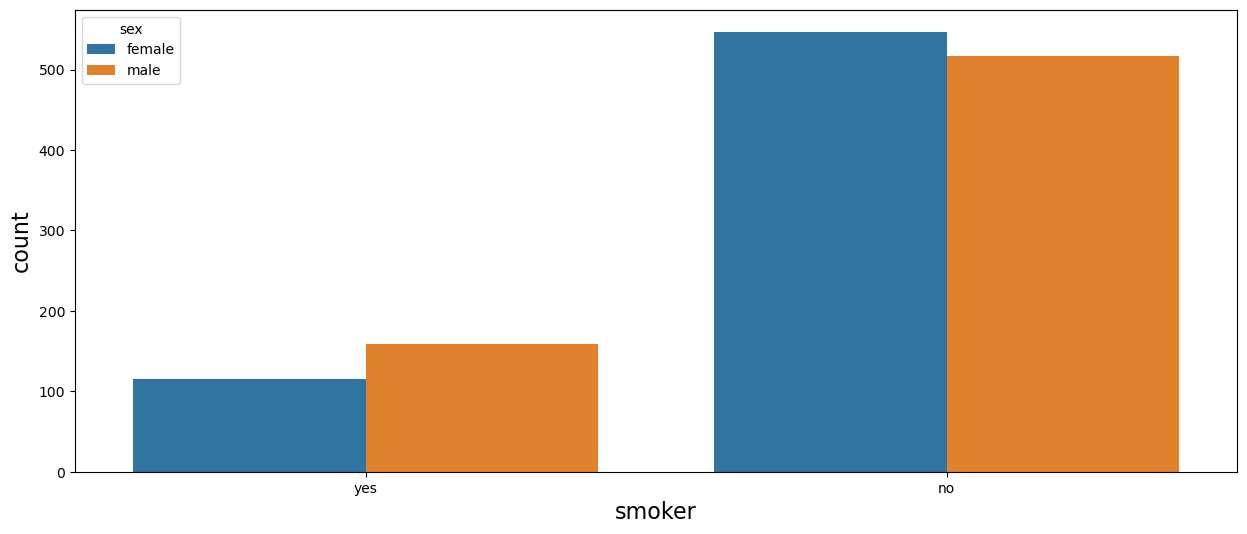

In [19]:
#Southeast region has more expenses then other region
plt.figure(figsize=(15,6))
bp6=sns.countplot(x=df1.smoker,hue=df1.sex)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)

In [20]:
#expenses increases with respect to bmi if the person is smoker

isSmoker=(df1['smoker']=='yes')
notsmoker=(df1['smoker']=='no')

In [21]:
df1.loc[isSmoker,'smoker']=1
df1.loc[notsmoker,'smoker']=0

In [22]:
SEregion=(df1['region']=='southeast')
SWregion=(df1['region']=='southwest')
NWregion=(df1['region']=='northwest')
NEregion=(df1['region']=='northeast')

In [23]:
df1.loc[SEregion,'region']=1
df1.loc[SWregion,'region']=2
df1.loc[NWregion,'region']=3
df1.loc[NEregion,'region']=4

In [24]:
men=(df1['sex']=='male')
women=(df1['sex']=='female')

In [25]:
df1.loc[men,'sex']=1
df1.loc[women,'sex']=0

In [26]:
convert_dict={'sex':float,'smoker':float,'region':float}

In [27]:
df1=df1.astype(convert_dict)

In [28]:
df1.expenses.corr(df1.smoker)

0.7872514298985548

In [29]:
#expenses increases with respect to bmi if the person is smoker
df1.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


In [30]:
cor=df1.corr()

<AxesSubplot:>

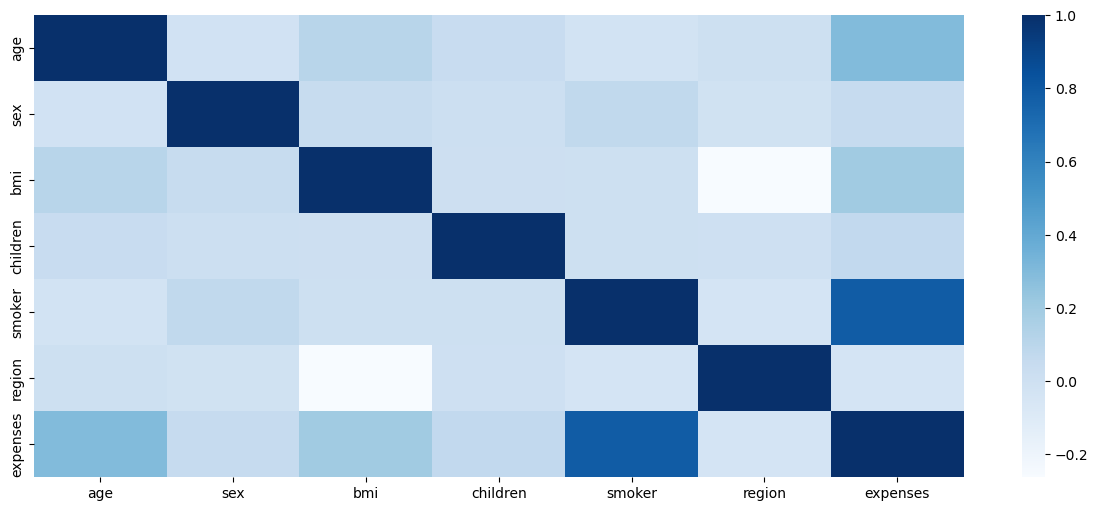

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='Blues')

# Train test split

In [32]:
#Applying Machine Learning Models

X=df1.drop(['expenses'],axis=1)
Y=df1['expenses']

In [33]:
#Dividing the data into train and Test

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1070, 6)
Shape of y_train =  (1070,)
Shape of X_test =  (268, 6)
Shape of y_test =  (268,)


In [35]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  

In [36]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(x_train)
    y_pred_model_test = model.predict(x_test)
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
    y_pred_cv_model = cross_val_predict(model, X, Y, cv=cvn)
    accuracy_cv_model = r2_score(Y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [38]:
regressor.fit(x_train,y_train)

LinearRegression()

In [39]:
model_summary(regressor, "Multiple_linear_Regression")

Multiple_linear_Regression
Training R2 Score:  0.7370016151361497
Testing R2 Score:  0.7998296193361614
RMSE for Training Data:  6140.445096976812
RMSE for Testing Data:  5643.8555314010555
Accuracy for 20 - Fold Cross Predicted:  0.7472738794666414


In [44]:
print("Accuracy: ",regressor.score(x_test,y_test)*100,'%')

Accuracy:  79.98296193361614 %


# Applying Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(x_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training R2 Score:  0.8729818821059496
Testing R2 Score:  0.8348947400286508
RMSE for Training Data:  4267.329210234343
RMSE for Testing Data:  5125.7383763305415
Accuracy for 20 - Fold Cross Predicted:  0.8498632643795985


In [43]:
print("Accuracy: ",regressor.score(x_test,y_test)*100,'%')

Accuracy:  79.98296193361614 %


# Applying Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
model_summary(random_forest_reg,"Random_Forest_Regressor")

Random_Forest_Regressor
Training R2 Score:  0.9737585010805226
Testing R2 Score:  0.8790199652807941
RMSE for Training Data:  1939.6243656382042
RMSE for Testing Data:  4387.658651595511
Accuracy for 20 - Fold Cross Predicted:  0.8377239132077866
